In [39]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

import pandas as pd
from sklearn.datasets import load_digits

In [40]:
data = load_digits()
df = pd.DataFrame(data.data)
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [25]:
df['Target'] = data.target

In [26]:
df

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,Target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


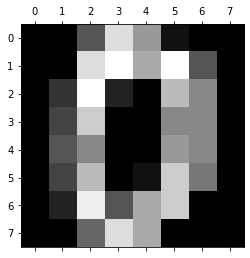

In [23]:
import matplotlib.pyplot as plt
import numpy as np
plt.matshow(data.images[0],cmap = 'gray')

In [27]:
from sklearn.model_selection import train_test_split
X = df.drop(['Target'],axis = 'columns')
y = df['Target']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [28]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)

In [31]:
toy = [i for i in range(50)]
for train_index,test_index in kf.split(toy):
    print(train_index,test_index)

[10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33
 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49] [0 1 2 3 4 5 6 7 8 9]
[ 0  1  2  3  4  5  6  7  8  9 20 21 22 23 24 25 26 27 28 29 30 31 32 33
 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49] [10 11 12 13 14 15 16 17 18 19]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 30 31 32 33
 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49] [20 21 22 23 24 25 26 27 28 29]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 40 41 42 43 44 45 46 47 48 49] [30 31 32 33 34 35 36 37 38 39]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39] [40 41 42 43 44 45 46 47 48 49]


In [47]:
def evaluate_model(model,X_train,X_test,y_train,y_test):
    model.fit(X_train,y_train)
    return model.score(X_test,y_test)

def mean(a):
    s = 0
    for i in a:
        s += i
    return s/len(a)

model = SVC()
performance = []
for train_index,test_index in kf.split(data.data,data.target):
    X_train,X_test,y_train,y_test = data.data[train_index],data.data[test_index],data.target[train_index],data.target[test_index]
    score = evaluate_model(model,X_train,X_test,y_train,y_test)
    performance.append(score)
print(mean(performance))

0.9632838130609718


###### Using StratifiedKFold

In [44]:
def evaluate_model(model,X_train,X_test,y_train,y_test):
    model.fit(X_train,y_train)
    return model.score(X_test,y_test)

model = SVC()
performance = []

from sklearn.model_selection import StratifiedKFold

kf = StratifiedKFold(n_splits=5)

for train_index,test_index in kf.split(data.data,data.target):
    X_train,X_test,y_train,y_test = data.data[train_index],data.data[test_index],data.target[train_index],data.target[test_index]
    score = evaluate_model(model,X_train,X_test,y_train,y_test)
    performance.append(score)
print(performance)

[0.9611111111111111, 0.9444444444444444, 0.9832869080779945, 0.9888579387186629, 0.9387186629526463]


###### Using library

In [50]:
from sklearn.model_selection import cross_val_score
performance = cross_val_score(SVC(),data.data,data.target,cv = 3)
print(performance.mean())

0.9699499165275459
